### Marketing and Customer Segmentation (Business Case)

source : https://youtu.be/MI3rtVyBEC8

#### Kenapa Customer Segmentation Penting
* Dapat membuat pesan pemasaran yang lebih mengena ke tiap pelanggan
* Bisa lebih mengenal customer / pelanggan
* Biaya pemasaran bisa menjadi lebih rendah

#### Kenapa Perlu Bantuan Algoritma untuk Customer Segmentation?
* Agar kita dapat membagi-bagi segmen customer dengan gampang
* Dapat membantu kita menentukan jumlah clustering yang optimal
* Dapat memberikan hasil jauh lebih cepat
* Karena bisa memberikan best practice

#### Customer Segmentation

* Customer segmentation adalah proses penting yang diperlukan di bisnis untuk mengenal customer dengan lebih baik
* Dengan demikian proses bisnis di marketing (pemasaran) dan CRM (customer relationship management) bisa dilakukan lebih tajam. Contoh: pesan marketing bisa lebih personal untuk setiap segment dengan biaya lebih optimal.
* Dengan proses yang lebih tajam, performa bisnis berpotensi tinggi menjadi lebih baik juga.
* Untuk menemukan segmentasi yang baik, perlu proses analisa data dari profile customer yang cukup banyak dan rutin. Ini bisa dibantu dengan algoritma komputer.

#### Pengantar

Persiapan data adalah langkah pertama yang perlu dilakukan sebelum menggunakan algoritma apapun untuk melakukan analisa data. Ini dikarenakan tiap implementasi algoritma menuntut struktur dan tipe data yang berbeda. Dan untuk kasus algoritma K-Means yang akan digunakan untuk otomatisasi clustering, maka struktur datanya adalah data.frame atau matrix yang di dalamnya berisi angka semua. Tidak ada yang boleh bertipe karakter.

Namun pada kasus riil, hal ini tentulah tidak mungkin. Contoh, isi data profesi seperti "Professional", "Ibu Rumah Tangga" adalah teks. Dan ini perlu dikonversi dulu ke numerik, namun jika diperlukan tetap bisa kembali mengambil data teks.

Berikut ini adalah langkah-langkah untuk mempersiapkan data sebelum dapat digunakan algoritma clustering:

1. Mengenal Contoh File Dataset Pelanggan
2. Membaca File dengan read.csv
3. Vector untuk Menyimpan Nama Field
4. Konversi Data dengan data.matrix
5. Menggabungkan Hasil Konversi
6. Menormalisasikan Nilai Belanja
7. Membuat Data Master

### Dataset Customer Segments

Dataset yang akan digunakan adalah data customer dengan field “Customer ID”, “Nama Pelanggan”,”Jenis Kelamin”,”Umur”, “Profesi”, “Tipe Residen” dan “Nilai Belanja Setahun” dengan tampilan sebagai berikut.

![dataset](images/dataset.png)

Data tersebut memiliki tujuh kolom dengan penjelasan sebagai berikut:

* **Customer ID**: Kode pelanggan dengan format campuran teks CUST- diikuti angka
* **Nama Pelanggan**: Nama dari pelanggan dengan format teks tentunya
* **Jenis Kelamin**: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
* **Umur**: Umur dari pelanggan dalam format angka
* **Profesi**: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
* **Tipe Residen**: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
* **NilaiBelanjaSetahun**: Merupakan nilai belanja customer selama setahun

Terlihat kalau ada kolom yang berisi angka saja, yaitu Umur dan NilaiBelanjaSetahun. Sisanya diisi data kategori untuku kolom "Jenis Kelamin", "Profesi" dan "Tipe Residen". Sedangkan "Customer ID" dan "Nama Pelanggan" dianggap memiliki nilai yang unik untuk tiap baris data dan mewakili tiap individu.

Karena kolom "Customer ID" dan "Nama Pelanggan" karena unik maka tidak akan dijadikan variable penentu segmentasi, namun sisa kolom lainnya akan digunakan.

### Membaca data dengan fungsi read.csv

In [3]:
pelanggan<-read.csv("dataset/customer_segments.txt",sep="\t")
head(pelanggan)

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
2,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
3,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
4,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
5,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206
6,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541


Terlihat isi data dengan enam kolom dan terdapat nomor baris pada tiap data yang ditampilkan.

Perhatikan jika nama kolom asal terdapat karakter spasi, akan diubah menjadi tanda titik setelah dibaca dengan read.csv. Sebagai contoh, "Nama Pelanggan" diubah menjadi "Nama.Pelanggan".

Jika hanya ingin menampilkan beberapa kolom tertentu, misalkan untuk kolom "Jenis.Kelamin" dan "Profesi" maka perintahnya adalah sebagai berikut.

In [5]:
head(pelanggan[c("Nama.Pelanggan","Profesi")])

,Nama.Pelanggan,Profesi
,<chr>,<chr>
1,Budi Anggara,Wiraswasta
2,Shirley Ratuwati,Pelajar
3,Agus Cahyono,Professional
4,Antonius Winarta,Professional
5,"Ibu Sri Wahyuni, IR",Wiraswasta
6,Rosalina Kurnia,Professional


#### Vector untuk Menyimpan Nama Field

In [8]:
field_yang_digunakan<-c("Jenis.Kelamin", "Umur", "Profesi")
head(pelanggan[field_yang_digunakan])

,Jenis.Kelamin,Umur,Profesi
,<chr>,<int>,<chr>
1,Pria,58,Wiraswasta
2,Wanita,14,Pelajar
3,Pria,48,Professional
4,Pria,53,Professional
5,Wanita,41,Wiraswasta
6,Wanita,24,Professional


### Konversi Data dengan data.matrix

Isi data dari tiga kolom pelanggan yaitu "Jenis.Kelamin", "Profesi" dan "Tipe.Residen" merupakan data kategori yang berupa teks, untuk fungsi **k-means**, ketiga kolom ini tidak bisa digunakan kecuali isi dikonversi menjadi numerik. Salah satu caranya adalah dengan menggunakan fungsi **data.matrix**.

Perintahnya sebagai berikut.

In [10]:
head(data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi")]))

Jenis.Kelamin,Profesi
1,5
2,3
1,4
1,4
2,5
2,4


Perintah ini akan mengkonversi data pelanggan pada kolom "Jenis.Kelamin" dan "Profesi" yang diwakili oleh 

    pelanggan[c("Jenis.Kelamin", "Profesi")] 

menjadi numerik.

![konversi](images/konversi.png)

Terlihat, teks "Pria" diubah menjadi angka 1, "Wanita" diubah menjadi angka 2, "Wiraswasta" diubah menjadi angka 5, dan seterusnya.

### Menggabungkan Hasil Konversi

Setelah melakukan konversi ke angka, data perlu digabungkan kembali variable asal.
Ini berguna terutama ketika akan mengenali data pelanggan baru masuk ke segment mana.

Untuk menggabungkan data hasil konversi data.matrix ke pelanggan, dapat digunakan function data.frame.

Sebagai contoh, untuk menggabungkan variable pelanggan dan pelanggan_matrix maka perintahnya adalah sebagai berikut.

    data.frame(pelanggan, pelanggan_matrix)

In [24]:
#Konversi data ke dalam bentuk angka matrix
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
#Penggabungan data
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
#Tampilkan kembali data hasil penggabungan
head(pelanggan)

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9.497927e-30,1,5,2
2,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2.722700e-30,2,3,1
3,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5.286429e-30,1,4,1
4,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5.204498e-30,1,4,1
5,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,1.061521e-29,2,5,1
6,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5.215541e-30,2,4,1


Akhiran .1 ini ditambahkan karena di variable pelanggan sudah ada nama kolom yang sama.

Sebagai contoh kolom "Jenis.Kelamin" yang terdapat pada pelanggan_matrix sudah ada juga di variable pelanggan. Jadi ketika digabungkan, R akan menambahkan akhiran .1 untuk kolom "Jenis.Kelamin" yang terdapat di pelanggan_matrix.

### Menormalisasikan Nilai Belanja

Perhatikan kolom "NilaiBelanjaSetahun" isi datanya bernilai jutaan. Ketika kolom ini digunakan untuk clustering, perhitungan sum of squared errors (pada bab kmeans) akan menjadi sangat besar.

Oleh sebab itu perlu dilakukan normalisasi nilainya agar perhitungan lebih sederhana dan mudah dicerna, namun tidak mengurangi akurasi. Ini terutama akan sangat bermanfaat jika jumlah data sangat banyak, misalkan memiliki 200 ribu data.

Normalisasi bisa dilakukan dengan banyak cara. Dalam kasus ini, cukup dengan pembagian sehingga nilai jutaan menjadi puluhan.

In [25]:
#Normalisasi Nilai
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun / 1000000
head(pelanggan)

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9.497927e-36,1,5,2
2,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2.722700e-36,2,3,1
3,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5.286429e-36,1,4,1
4,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5.204498e-36,1,4,1
5,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,1.061521e-35,2,5,1
6,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5.215541e-36,2,4,1


### Membuat Data Master

Setelah penggabungan data, maka dapat diketahui sebenarnya teks kategori dikonversi menjadi angka numerik berapa.

Contoh :

In [27]:
head(pelanggan[c("Profesi","Profesi.1")],10)

,Profesi,Profesi.1
,<chr>,<int>
1,Wiraswasta,5
2,Pelajar,3
3,Professional,4
4,Professional,4
5,Wiraswasta,5
6,Professional,4
7,Wiraswasta,5
8,Professional,4
9,Professional,4


Kelihatan kalau Wiraswasta dikonversi menjadi angka 5, Pelajar menjadi angka 3, Professional menjadi angka 4, Ibu Rumah Tangga menjadi angka 1, dan satu lagi  adalah Mahasiswa yang dikonversi menjadi angka 2 (tidak terlihat disini).

Daftar data kategori dan hasil konversinya sangat penting untuk dijadikan referensi sehingga nanti ketika ada data baru, bisa "petakan" menjadi data numerik yang siap digunakan untuk algoritma clustering.

Permasalahnya data di atas terlalu panjang, padahal sebenarnya cuma diperlukan 5 baris data, untuk meringkas data dapat dilakukan dengan menggunakan fungsi unique

In [28]:
unique(pelanggan[c("Profesi","Profesi.1")])

,Profesi,Profesi.1
,<chr>,<int>
1,Wiraswasta,5
2,Pelajar,3
3,Professional,4
17,Ibu Rumah Tangga,1
31,Mahasiswa,2


Terlihat ya datanya sudah diringkas dengan teks kategori beserta pasangan numeriknya. Kemudian perhatikan juga angka-angka 1,2,3,17 dan 31 yang terdapat di bagian paling kiri. Ini menunjukkan posisi baris ditemukannya teks tersebut.

Data ringkas dan unik ini untuk selanjutnya disebut sebagai data referensi atau data master.

In [29]:
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Residen <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])

### Tahap Preparation Selesai

Untuk algoritma clustering k-means yang akan digunakan di R, maka tahap data preparationnya adalah menyiapkan data yang di dalamnya harus berisi numerik.

Namun pada banyak kasus riil, data tidak sepenuhnya berisi numerik seperti pada dataset yang digunakan dalam analisis ini, adapun langkah-langkah data preparation adalah sebagai berikut:

1. Mengenal Contoh File Dataset Pelanggan.
2. Membaca File dengan read.csv.
3. Vector untuk Menyimpan Nama Field.
4. Konversi Data dengan data.matrix.
5. Menggabungkan Hasil Konversi, hasil konversi ini perlu kita gabungkan kembali ke variable asal agar kita tidak kehilangan referensinya.
6. Menormalisasikan Nilai Belanja, yakni merubah skala data nilai belanja dari jutaan menjadi puluhan dengan tujuan penyederhanaan perhitungan namun tidak mengurangi akurasi.
7. Membuat Data Master, yakni meringkas data kategori dan numerik ke dalam variable-variable yang disebut sebagai data master.

Selanjutnya adalah melakukan Clustering dengan Algoritma K-Means.

### Apa itu Clustering dan algoritma K-Means?

Clustering adalah proses pembagian objek-objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara satu objek dengan yang lain.

Beberapa contoh clustering:

Pengelompokan manusia berdasarkan umur: bayi, balita, anak, remaja, dewasa, tua.
Pengelompokan customer berdasarkan daya belinya: regular dan premium.
Pengelompokan makanan berdasarkan kandungan gizinya: biji-bijian, sayuran, buah-buahan, minyak, protein, dan lain-lain.

Banyak algoritma telah dikembangkan untuk melakukan clustering secara otomatis, salah satu yang sangat populer adalah **K-Means**.

**K-means** adalah algoritma yang membagi data menjadi sejumlah partisi dengan cara sederhana: mencari kedekatan dari tiap titik pada suatu cluster dengan sejumlah nilai rata-rata atau mean.

Ada dua konsep kunci yang juga menjadi nama asal k-means:

1. Jumlah partisi yang diinginkan, diwakili oleh huruf k
2. Mencari "jarak" kedekatan tiap titik ke sejumlah nilai rata-rata cluster yang diamati, diwakili oleh means

Algoritma k-means sudah ada di paket dasar R dalam bentuk function bernama kmeans.

Source : https://youtu.be/6QV4vPpDxKQ

### Fungsi kmeans

Dalam kasus ini akan dilakukan segmentasi langsung pada data pelanggan – yang telah dilakukan persiapan datanya sebelumnya – dengan menggunakan function kmeans.

Function kmeans memerlukan minimal 2 parameter, yaitu:

* **x**: data yang digunakan, dimana semua isi datanya harus berupa numerik.
* **centers**: jumlah cluster yang diinginkan.

Dan fungsi kmeans ini biasanya disertai dengan pemanggilan function seet.seed. Ini berguna untuk "menyeragamkan" daftar nilai acak yang sama dari kmeans sehingga didapatkan output yang sama.

Berikut adalah contoh penggunaan fungsi kombinasi set.seed dan kmean.

    set.seed(100)
    kmeans(x=pelanggan[c("Umur","Profesi.1")], centers=3)
    
Ini artinya data pelanggan akan dibagi berdasarkan "Umur" dan "Profesi" menjadi 3 segmen.

Kadang kala, parameter data dan jumlah segmen saja tidak cukup. Perlu digunakan parameter ketiga yaitu **nstart**, yang merupakan jumlah kombinasi acak yang dihasilkan secara internal oleh R. Berdasarkan jumlah yang diberikan, algoritma akan memilih mana yang terbaik dari kombinasi-kombinasi tersebut.

Kata terbaik berarti jarak antara tiap titik ke mean dari clusternya sendiri lebih kecil dibandingkan ke mean dari cluster lain.

Perlu untuk diingat bahwa mean atau nilai rata-rata di sini sering disebut juga dengan centroid pada berbagai literatur data science.

Berikut adalah modifikasi pemanggilan fungsi dengan parameter tambahan nstart sebesar 25.

    kmeans(x=pelanggan[c("Umur","Profesi.1")], centers=3, nstart=25)

In [31]:
#Bagian Data Preparation
pelanggan <- read.csv("dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
#Bagian K-Means
set.seed(100)
#fungsi kmeans untuk membentuk 5 cluster dengan 25 skenario random dan simpan ke dalam variable segmentasi
segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)
#tampilkan hasil k-means
segmentasi

K-means clustering with 5 clusters of sizes 5, 12, 14, 9, 10

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1            1.40 61.80000  4.200000       1.400000            8.696132
2            1.75 31.58333  3.916667       1.250000            7.330958
3            2.00 20.07143  3.571429       1.357143            5.901089
4            2.00 42.33333  4.000000       1.555556            8.804791
5            1.70 52.50000  3.800000       1.300000            6.018321

Clustering vector:
 [1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4 2 5 2 4 5 4 3 4 3 3 4 2 3 4
[39] 3 3 3 2 2 3 3 3 5 4 2 5

Within cluster sum of squares by cluster:
[1]  58.21123 174.85164 316.73367 171.67372 108.49735
 (between_SS / total_SS =  92.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Hasil ini dapat dibagi dalam lima bagian, dengan penjelasan sesuai nomor urut pada gambar sebagai berikut:

1. Ukuran / jumlah titik data pada tiap cluster
2. Nilai rata-rata (centroid) dari tiap cluster
3. Pembagian cluster dari tiap elemen data berdasarkan posisinya
4. Jumlah jarak kuadrat dari tiap titik ke centroidnya
5. Komponen informasi lain yang terkandung di dalam objek kmeans ini

### Analisa Hasil Clustering Vector

Untuk menganalisa hasil, akan diawali dari hasil bagian ketiga, yaitu **clustering vector**.

![clust1](images/clust1.png)

Clustering vector ini adalah rangkaian vector yang berisi angka cluster. Dari hasil diatas, vector berisi angka 1 sampai dengan 5, maksimum sesuai dengan jumlah cluster yang diinginkan.

Vector ini dimulai dari angka 2, yang artinya data pertama dari dataset akan dialokasikan pada nomor cluster 2. Dari gambar juga terlihat isi vector kedua bernlai 1, ini artinya data kedua dari dataset dialokasikan pada nomor cluster 1, dan seterusnya. Posisi data terakhir (ke-50) memiliki nomor cluster 5.

Hasil ini dapat diakses dengan komponen cluster dari objek hasil seperti berikut:

    segmentasi$cluster

In [3]:
#Bagian Data Preparation
pelanggan <- read.csv("dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)

Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])

pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")

#Bagian K-Means
set.seed(100)
segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)

#Penggabungan hasil cluster
segmentasi$cluster
pelanggan$cluster <- segmentasi$cluster
str(pelanggan)

[1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4 2 5 2 4 5 4 3 4 3 3 4 2 3 4
[39] 3 3 3 2 2 3 3 3 5 4 2 5

'data.frame':	50 obs. of  11 variables:
 $ Customer_ID        : chr  "CUST-001" "CUST-002" "CUST-003" "CUST-004" ...
 $ Nama.Pelanggan     : chr  "Budi Anggara" "Shirley Ratuwati" "Agus Cahyono" "Antonius Winarta" ...
 $ Jenis.Kelamin      : chr  "Pria" "Wanita" "Pria" "Pria" ...
 $ Umur               : int  58 14 48 53 41 24 64 52 29 33 ...
 $ Profesi            : chr  "Wiraswasta" "Pelajar" "Professional" "Professional" ...
 $ Tipe.Residen       : chr  "Sector" "Cluster" "Cluster" "Cluster" ...
 $ NilaiBelanjaSetahun: num  9.5 2.72 5.29 5.2 10.62 ...
 $ Jenis.Kelamin.1    : int  1 2 1 1 2 2 1 1 2 1 ...
 $ Profesi.1          : int  5 3 4 4 5 4 5 4 4 4 ...
 $ Tipe.Residen.1     : int  2 1 1 1 1 1 2 1 2 1 ...
 $ cluster            : int  1 3 5 5 4 3 1 5 2 2 ...


### Analisa Hasil Cluster Size

Tahap berikutnya, adalah menganalisa hasil pada bagian pertama

![clust2](images/clust2.PNG)

Ini artinya dengan k-means telah membagi dataset pelanggan dengan 5 cluster, dimana:

* Cluster ke-1 memiliki 14 data
* Cluster ke-2 memiliki 5 data
* Cluster ke-3 memiliki 9 data
* Cluster ke-4 memiliki 12 data
* Cluster ke-5 memiliki 10 data

Dengan jumlah total 50 data, yang juga merupakan jumlah data total pelanggan.

Untuk melakukan verifikasi hal tersebut, dapat dilakukan dengan memulai dari cluster 1. Data pelanggan yang isi dari kolom clusternya adalah 1 akan diambil dengan menggunakan fungsi which, seperti perintah berikut.

In [39]:
#Filter cluster ke-1
which(pelanggan$cluster == 1)

[1]  1  7 13 14 18

Hasil di atas menunjukkan 5 angka posisi data untuk cluster 1. Banyaknya angka pada deretan ini sesuai ukuran untuk cluster ke-1 dari informasi di atas.

Sekarang untuk menghitung jumlah deretan dengan menambahkan perintah length pada fungsi which seperti berikut:

In [38]:
length(which(pelanggan$cluster == 1))

[1] 5

### Melihat Data pada Cluster ke-N

Berikut adalah perintah yang dapat diketikkan untuk melihat seluruh data pada cluster ke-3

In [43]:
pelanggan[which(pelanggan$cluster == 3),]

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1,cluster
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>
2,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2.722700,2,3,1,3
6,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5.215541,2,4,1,3
15,CUST-015,Shirley Ratuwati,Wanita,20,Wiraswasta,Cluster,10.365668,2,5,1,3
20,CUST-020,Irene Novianto,Wanita,16,Pelajar,Sector,2.896845,2,3,2,3
31,CUST-031,Eviana Handry,Wanita,19,Mahasiswa,Cluster,3.042773,2,2,1,3
33,CUST-033,Cecilia Kusnadi,Wanita,19,Mahasiswa,Cluster,3.047926,2,2,1,3
34,CUST-034,Deasy Arisandi,Wanita,21,Wiraswasta,Sector,9.759822,2,5,2,3
37,CUST-037,Felicia Tandiono,Wanita,25,Professional,Sector,5.972787,2,4,2,3
39,CUST-039,Gina Hidayat,Wanita,20,Professional,Cluster,5.257775,2,4,1,3


Dimana ada 14 data dengan seluruh data berjenis kelamin wanita dan umur antara 14 s/d 25 tahun. Penghasilan, profesi, nilai belanja dan tipe residen cukup bervariasi.

Dan untuk melihat cluster ke-1.

In [45]:
pelanggan[which(pelanggan$cluster == 1),]

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1,cluster
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9.497927,1,5,2,1
7,CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9.837260,1,5,2,1
13,CUST-013,Cahaya Putri,Wanita,64,Wiraswasta,Cluster,9.333168,2,5,1,1
14,CUST-014,Mario Setiawan,Pria,60,Wiraswasta,Cluster,9.471615,1,5,1,1
18,CUST-018,Nelly Halim,Wanita,63,Ibu Rumah Tangga,Cluster,5.340690,2,1,1,1


Akan tampil data sebagai berikut, dimana terlihat umur mayoritas sudah masuk usia 50 tahun ke atas dan kebanyakan adalah wiraswasta kecuali satu yang ibu rumah tangga. Dan rata-rata nilai belanja adalah sekitar 9 juta, kecuali yang berprofesi ibu rumah tangga.

### Analisa Hasil Cluster Means

Cluster means adalah hasil nilai rata-rata atau titik sentral (centroid) dari seluruh titik tiap cluster.

![clust31](images/clust31.png)

Apa artinya hasil tersebut?

* Kolom pertama yang berisi angka 1 sampai dengan 5 adalah mewakili nomor cluster.
* Kolom **Jenis.Kelamin.1** menunjukkan nilai rata-rata dari data jenis kelamin yang telah dikonversi menjadi numerik, dengan angka 1 mewakili Pria dan angka 2 mewakili wanita.

Pada cluster 3 terlihat bahwa hanya ada angka 2, artinya cluster 3 hanya berisi data dengan profil berjenis kelamin wanita. Untuk cluster ke-1 berupa angka 1.40 artinya data bersifat campuran namun cenderung ke Pria (1).

Kedua interpretasi angka ini sesuai dengan hasil praktek "Melihat Data pada Cluster-N".

* Kolom **Umur** adalah representasi dari dataset awal tanpa mengalami konversi. Terlihat untuk cluster ke-3 umur rata-rata adalah 20 tahun, umur 61 tahun untuk cluster ke-1, dan seterusnya.
 
* Kolom **Profesi.1** menunjukkan nilai rata-rata data Profesi untuk tiap cluster yang telah dikonversi menjadi numerik, yaitu angka 1 s/d 5.
* Angka 1, 2, 3, 4, dan 5 di kolom ini masing-masingnya secara berurutan mewakili Ibu Rumah Tangga, Mahasiswa, Pelajar, Professional, dan Wiraswasta. Terlihat untuk seluruh cluster bahwa nilai profesi berada dalam rentang 3.5 s/d 4.2 (3.5< profesi <= 4.2). Hal ini menunjukkan bahwa profesi cenderung ke ke Professional, dan secara tegas cluster keempat memiliki profesi berupa Professional.
* Kolom **Tipe.Residen.1** menunjukkan representasi data Tipe.Residen yang telah dikonversi menjadi numerik dengan angka 1 mewakili Cluster dan 2 mewakili Sector. Ini juga didapatkan dari hasil konversi data menjadi numerik pada praktek sebelumnya.
* Untuk seluruh cluster, terlihat data cukup tersebar antara Sector dan Cluster terutama untuk cluster ke-4 dimana nilai kolom ini di angka 1.555.
* Terakhir, kolom **NilaiBelanjaSetahun** cukup signifikan pembagiannya untuk tiap cluster. Cluster ke-1 dan ke-4 memiliki nilai belanja lebih tinggi dibandingkan ketiga cluster lainnya.
 

Ini mungkin target customer yang bisa lebih disasar melalui marketing campaign, karena cluster ke-1 saat ini hanya berisi 5 data. Cukup kecil proporsinya, dan ingin ditingkatkan.

Ini terlihat dari hasil output kmeans bagian pertama yang menunjukkan distribusi jumlah data dari tiap cluster:

![clust4](images/clust4.PNG)

In [47]:
# Melihat segmentasi dari obyek centers
segmentasi$centers

,Jenis.Kelamin.1,Umur,Profesi.1,Tipe.Residen.1,NilaiBelanjaSetahun
1,1.40,61.80000,4.200000,1.400000,8.696132
2,1.75,31.58333,3.916667,1.250000,7.330958
3,2.00,20.07143,3.571429,1.357143,5.901089
4,2.00,42.33333,4.000000,1.555556,8.804791
5,1.70,52.50000,3.800000,1.300000,6.018321


### Analisa Hasil Sum of Squares

Analisa berikutnya adalah bagian keempat, yaitu nilai metrik sum of squares seperti terlihat berikut ini.

![ss](images/ss.PNG)

Konsep sum of squares (SS) adalah jumlah "jarak kuadrat" perbedaan tiap titik data dengan mean atau centroidnya. SS ini bisa dengan mean atau centroid untuk tiap cluster atau secara keseluruhan data. Sum of squares dalam literatur data science lain sering disebut dengan Sum of Squared Errors (SSE).

Semakin besar nilai SS menyatakan semakin lebarnya perbedaan antar tiap titik data di dalam cluster tersebut.
Berdasarkan konsep tersebut, berikut adalah penjelasan untuk hasil output kmeans di atas:

1. **Nilai 316.73367** adalah SS untuk cluster ke-1, 58.21123 adalah SS untuk cluster ke-2, dan seterusnya. Semakin kecil nilainya berpotensi semakin baik.
2. **total_SS**: adalah SS untuk seluruh titik terhadap nilai rata-rata global, bukan untuk per cluster. Nilai ini selalu tetap dan tidak terpengaruh dengan jumlah cluster.
3. **between_SS**: adalah total_SS dikurangi dengan jumlah nilai SS seluruh cluster.
4. **(between_SS / total_SS)** adalah rasio antara between_SS dibagi dengan total_SS. Semakin besar persentasenya, umumnya semakin baik.

Ini adalah metrik yang bisa digunakan untuk menjawab seberapa baik jumlah cluster yang dibentuk? Apakah dibagi 2, 5, 10 atau 30?

In [5]:
#Bagian Data Preparation
pelanggan <- read.csv("dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
#Membandingkan dengan 2 cluster kmeans, masing-masing 2 dan 5
set.seed(100)
segmentasi<-kmeans(x=pelanggan[field_yang_digunakan], centers=2, nstart=25)
segmentasi
set.seed(100)
segmentasi<-kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)
segmentasi

K-means clustering with 2 clusters of sizes 23, 27

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1        1.739130 51.17391  3.913043       1.434783            7.551518
2        1.888889 25.85185  3.777778       1.296296            6.659586

Clustering vector:
 [1] 1 2 1 1 1 2 1 1 2 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 1 2 1 1 1 2 1 2 2 1 2 2 1
[39] 2 2 2 2 2 2 2 2 1 1 2 1

Within cluster sum of squares by cluster:
[1] 1492.481 1524.081
 (between_SS / total_SS =  72.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

K-means clustering with 5 clusters of sizes 5, 12, 14, 9, 10

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1            1.40 61.80000  4.200000       1.400000            8.696132
2            1.75 31.58333  3.916667       1.250000            7.330958
3            2.00 20.07143  3.571429       1.357143            5.901089
4            2.00 42.33333  4.000000       1.555556            8.804791
5            1.70 52.50000  3.800000       1.300000            6.018321

Clustering vector:
 [1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4 2 5 2 4 5 4 3 4 3 3 4 2 3 4
[39] 3 3 3 2 2 3 3 3 5 4 2 5

Within cluster sum of squares by cluster:
[1]  58.21123 174.85164 316.73367 171.67372 108.49735
 (between_SS / total_SS =  92.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

![ss2](images/ss2.PNG)

Terlihat untuk 2 cluster (k=2), SS per cluster lebih besar dibandingkan jika data dibagi menjadi 5 cluster (k=5). Perhatikan juga persentase rasio antara between_SS dan total_SS, dimana k=5 juga lebih besar.

### Available Components

Analisa terakhir adalah bagian kelimat, yaitu sembilan komponen objek yang bisa digunakan untuk lihat detil dari objek k-means.

Berikut adalah penjelasan singkat dari sembilan komponen tersebut.

![com](images/com.PNG)

Seluruh komponen tersebut bisa diakses dengan menggunakan aksesor $. Contoh, dengan variable kmeans yang bernama segmentasi dan jika ingin mengakses komponen withinss, maka dapat menggunakan perintah berikut.

In [6]:
segmentasi$withinssr

NULL

In [8]:
#Bagian Data Preparation
pelanggan <- read.csv("dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
#Bagian K-Means
set.seed(100)
segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)
segmentasi$withinss
segmentasi$tot.withinss

[1]  58.21123 174.85164 316.73367 171.67372 108.49735

[1] 829.9676

### Kesimpulan K-Means

Function kmeans sederhana digunakan tapi outputnya memiliki informasi yang kaya yaitu:

* Ukuran / jumlah titik data pada tiap cluster
* Nilai rata-rata (centroid) dari tiap cluster
* Vector item dari cluster
* Jumlah jarak kuadrat dari tiap titik ke centroidnya (Sum of Squares atau SS)
* Komponen-komponen informasi lain

### Grafik Garis

Dari informasi yang dihasilkan oleh function kmeans, metrick Sum of Squares (SS) atau sering disebut Sum of Squared Errors (SSE) sangat penting untuk dijadikan dasar menentukan jumlah cluster yang paling optimal.

Secara teoritis, berikut adalah beberapa hal yang bisa diamati dengan SS:

* Semakin sedikit jumlah cluster yang dihasilkan maka semakin besar nilai SS.
* Begitu juga sebaliknya, semakin banyak jumlah cluster yang dihasilkan maka semakin kecil nilai SS nya.
* Karena sifatnya kuadratik, jika terdapat perbedaan yang cukup signifikan antara tiap kombinasi cluster maka perbedaan nilai SS akan semakin besar.
* Dan seiring bertambahnya jumlah cluster, perbedaan tiap SS ini akan semakin kecil.

Jika dimasukkan ke dalam grafik garis, maka plotting dari total SS untuk tiap cluster berbentuk sebagai berikut.

![plot](images/plot.png)

Titik paling kiri adalah jumlah SS untuk 1 jumlah cluster, titik kedua adalah untuk 2 jumlah cluster, dan seterusnya.Perhatikan semakin ke kanan perbedaan jarak antar tiap titik semakin mengecil.

Grafik garis ini memiliki bentuk seperti siku tangan, dan untuk optimal jumlah cluster biasanya dapat dilakukan dengan mengambil titik sikunya. Pada contoh di atas dapat diambil 4 atau 5.

Proses pengambilan keputusan berdasarkan plotting siku ini biasanya disebut **Elbow Effect** atau **Elbow Method**.

Source : https://youtu.be/PcJXn1fIgJc

### Simulasi Jumlah Cluster dan SS

Metrik elbow method yang digunakan sebagai basis justifikasi adalah Sum of Squares (SS), atau lebih tepatnya komponen tot.withinss dari objek kmeans.

Metrik ini akan dicari progressive nilai tot.withinss untuk tiap kombinasi jumlah cluster, dan disimpan dalam bentuk vector di R.

Untuk keperluan ini, akan digunakan *sapply*. Function *sapply* akan digunakan untuk memanggil function kmeans untuk suatu range jumlah cluster. Range ini akan menggunakan 1 sampai dengan 10.

Code lengkapnya sebagai berikut:

In [10]:
sse <- sapply(1:10,
function(param_k)
{
kmeans(pelanggan[field_yang_digunakan], param_k, nstart=25)$tot.withinss
}
)
sse

[1] 10990.9740  3016.5612  1550.8725  1064.4187   829.9676   625.1462
 [7]   508.1568   431.6977   374.1095   317.9424

Berikut adalah penjelasan lengkap elemen-elemen perintah di atas

![sapply](images/sapply.PNG)

### Grafik Elbow Effect

Untuk melakukan visualisasi vector Sum of Squares (SS) atau Sum of Squared Errors (SSE) yang telah dihasilkan, maka dapat menggunakan ggplot, datasetnya berupa penggabungan data frame dari sse dan range nilai 1:10, dengan perintah berikut.

Warning message:
"Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?"


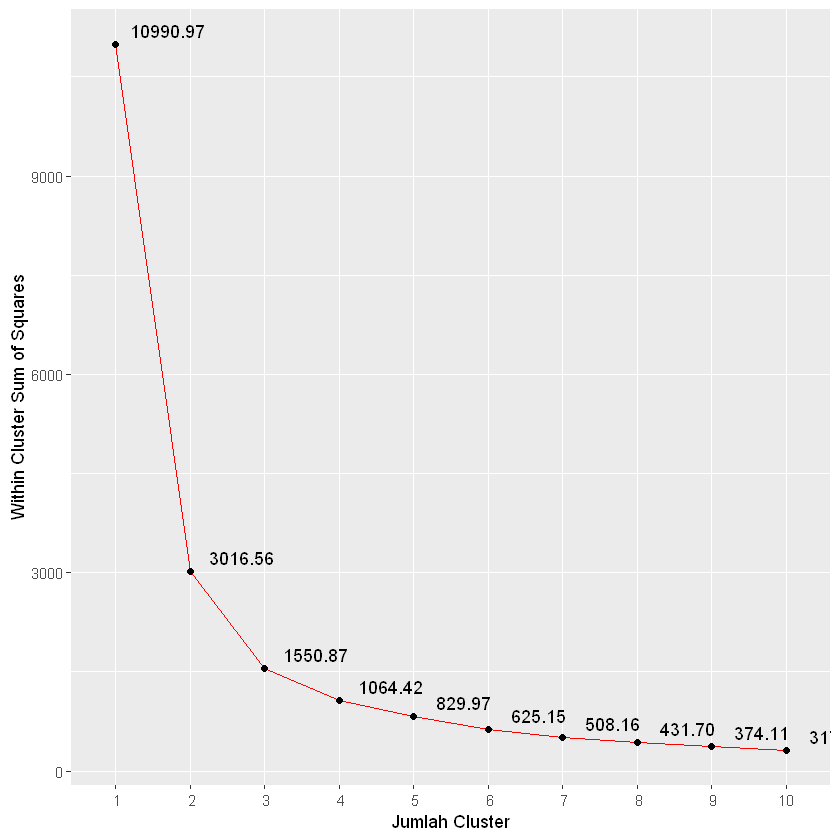

In [13]:
library(ggplot2)
jumlah_cluster_max <- 10
ssdata = data.frame(cluster=c(1:jumlah_cluster_max),sse)
ggplot(ssdata, aes(x=cluster,y=sse)) +
                geom_line(color="red") + geom_point() +
                ylab("Within Cluster Sum of Squares") + xlab("Jumlah Cluster") +
                geom_text(aes(label=format(round(sse, 2), nsmall = 2)),hjust=-0.2, vjust=-0.5) +
  scale_x_discrete(limits=c(1:jumlah_cluster_max))

Berikut adalah gambaran grafik yang akan dihasilkan – dengan pasangan indikator nomor yang menunjukkan perintah dan komponen grafik yang dihasilkan. Sebagai contoh, penomoran nomor 1 yaitu  geom_line(color="red") menghasilkan grafik garis berwarna merah.

![plot2](images/plot2.png)

Dengan memanfaatkan nilai Sum of Squares (SS) atau Sum of Squared Errors (SSE) dapat diambil keputusan jumlah segmentasi optimal yang digunakan.

Ini dilakukan dengan membuat simulasi iterasi jumlah cluster dari 1 sampai dengan jumlah maksimum yang diinginkan.

Setelah mendapatkan nilai SS dari tiap jumlah cluster, dapat dilakukan plotting ke grafik garis dan menggunakan elbow method untuk menentukan jumlah cluster optimal.

Tahap berikutnya adalah mempaketkan objek kmeans ini dan semua informasi yang berkaitan sehingga dapat digunakan untuk operasional.

### Next Step

Setelah berhasil mempersiapkan data, menggunakan algoritma kmeans, dan akhirnya bisa memutuskan jumlah cluster terbaik.

Maka tahapan berikutnya adalah "memaketkan" atau "membungkus" seluruh referensi hasil konversi dan objek kmeans ini supaya bisa digunakan untuk mengolah data baru dan berguna di bisnis.

Untuk ini tahapannya adalah sebagai berikut:

* Menamakan cluster dengan karakteristik yang lebih mudah dimengerti. Penamaan ini disimpan dalam variable Segmen.Pelanggan.
* Menggabungkan variable Segmen. Pelanggan, Profesi, Jenis.Kelamin, Tipe.Residen, dan Segmentasi ke dalam satu objek bertipe list ke dalam variable Identitas.Cluster.
* Menyimpan objek Identitas.Cluster dalam bentuk file sehingga dapat digunakan kemudian, ini bisa disebut model.

### Menamakan Segmen

Selanjutnya akan dilakukan penamaan segmen sesuai dengan karakteristiknya. Untuk membantu, gambar berikut menunjukkan nilai mean tiap kolom yang digunakan tiap cluster dan juga nilai kolom sebelum konversi.

![segmen](images/segmen.png)

##### Penamaan Cluster

* **Cluster 1** : Silver Youth Gals: alasannya adalah karena umurnya rata-rata adalah 20, wanita semua, profesinya bercampur antar pelajar dan professional serta pembelanjaan sekitar 6 juta.
* **Cluster 2** : Diamond Senior Member: alasannya adalah karena umurnya rata-rata adalah 61 tahun dan pembelanjaan di atas 8 juta.
* **Cluster 3** : Gold Young Professional: alasannya adalah karena umurnya rata-rata adalah 31 tahun, professional dan pembelanjaan cukup besar.
* **Cluster 4** : Diamond Profesional: alasannya adalah karena umurnya rata-rata adalah 42 tahun, pembelanjaan paling tinggi dan semuanya professional.
* **Cluster 5** : Silver Mid Professional: alasannya adalah karena umurnya rata-rata adalah 52 tahun dan pembelanjaan sekitar 6 juta.
Selanjutnya penamaan diatas akan dimasukkan sebagai named vector.

In [15]:
#Penamaan Segmen
Segmen.Pelanggan <- data.frame(cluster=c(1,2,3,4,5),Nama.Segmen=c("Silver Youth Gals","Diamond Senior Member","Gold Young Professional","Diamond Professional","Silver Mid Professional"))
Segmen.Pelanggan

cluster,Nama.Segmen
<dbl>,<chr>
1,Silver Youth Gals
2,Diamond Senior Member
3,Gold Young Professional
4,Diamond Professional
5,Silver Mid Professional


### Menggabungkan Referensi

Sejauh ini telah didapatkan pembentukan aset-aset data sebagai berikut:

* Dataset pelanggan yang telah "diperkaya" dengan tambahan kolom hasil konversi teks menjadi numerik, dan menormalisasikan field **NilaiBelanjaSetahun**.
* Objek **kmeans** dengan k=5, dipilih berdasarkan metodologi menggunakan metrik Sum of Squares (SS).
* Membuat variable referensi atau pemetaan numerik dan teks asli (kategori) dari kolom **Jenis Kelamin**, **Profesi** dan **Tipe Residen**.
* Variable data.frame dengan nama **Pelanggan** yang berisi penamaan cluster sesuai analisa karakteristik dari centroid kolom-kolom pelanggan yang digunakan.
* Vector dari field yang digunakan.

Akan sangat baik jika semuanya digabungkan di satu variable dengan tipe list, dan ini akan jadi model yang dapat disimpan ke dalam file dan digunakan ketika diperlukan.

In [17]:
#Membaca data csv dan dimasukkan ke variable pelanggan
pelanggan <- read.csv("dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
pelanggan$NilaiBelanjaSetahun = pelanggan$NilaiBelanjaSetahun/1000000
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Residen <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])

#Bagian K-Means
set.seed(100)
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)
Segmen.Pelanggan <- data.frame(cluster=c(1,2,3,4,5), Nama.Segmen=c("Silver Youth Gals", "Diamond Senior Member", "Gold Young Professional", "Diamond Professional", "Silver Mid Professional"))

#Menggabungkan seluruh aset ke dalam variable Identitas.Cluster
Identitas.Cluster <- list(Profesi=Profesi, Jenis.Kelamin=Jenis.Kelamin, Tipe.Residen=Tipe.Residen, Segmentasi=segmentasi, Segmen.Pelanggan=Segmen.Pelanggan, field_yang_digunakan=field_yang_digunakan)

In [18]:
Identitas.Cluster

$Profesi
            Profesi Profesi.1
1        Wiraswasta         5
2           Pelajar         3
3      Professional         4
17 Ibu Rumah Tangga         1
31        Mahasiswa         2

$Jenis.Kelamin
  Jenis.Kelamin Jenis.Kelamin.1
1          Pria               1
2        Wanita               2

$Tipe.Residen
  Tipe.Residen Tipe.Residen.1
1       Sector              2
2      Cluster              1

$Segmentasi
K-means clustering with 5 clusters of sizes 5, 12, 14, 9, 10

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1            1.40 61.80000  4.200000       1.400000            8.696132
2            1.75 31.58333  3.916667       1.250000            7.330958
3            2.00 20.07143  3.571429       1.357143            5.901089
4            2.00 42.33333  4.000000       1.555556            8.804791
5            1.70 52.50000  3.800000       1.300000            6.018321

Clustering vector:
 [1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4

### Menyimpan Objek dalam Bentuk File

Objek yang sudah digabungkan sebelumnya sudah memiliki semua aset yang diperlukan untuk mengalokasikan data baru ke segmen yang sesuai.

Untuk menyimpan objek ini ke dalam file, dapat menggunakan function **saveRDS**. File ini kemudian dapat dibuka kembali sebagai objek ke depannya.

Sebagai contoh, perintah untuk menyimpan objek **Identitas.Cluster** ke file **cluster.rds** adalah sebagai berikut.

In [19]:
saveRDS(Identitas.Cluster,"cluster.rds")

Seluruh aset yang diperlukan untuk membentuk suatu model telah berhasil digabungkan.

Model ini adalah objek yang bisa digunakan untuk mengolah data baru dan terdiri dari objek kmeans, variable referensi hasil konversi teks ke numerik, dan juga penamaan cluster.

### Mengoperasionalkan Model

Ini artinya objek hasil pengolahan algoritma K-Means dan variable-variable terkait yang telah dihasilkan sebelumnya harus dapat digunakan ke kasus riil sehingga satu siklus lengkap terjadi.

Kasus riil untuk clustering yang digunakan adalah cukup sederhana: bagaimana data baru dapat otomatis membantu tim marketing dan CRM untuk mengidentifikasi segmen mana pelanggan tersebut berada dengan cepat.

Dengan kecepatan identifikasi, maka organisasi atau bisnis dapat dengan cepat bergerak dengan pesan marketing yang efektif dan memenangkan persaingan.

### Data Baru

Pada teks sebelumnya, disebutkan data pelanggan baru harus cepat dipetakan ke segmen.

Dengan asumsi tiap data pelanggan baru diinput ke dalam sistem, maka pengolahan adalah per record. Dalam kasus ini, akan dibuat data.frame dengan satu data dimana nama-nama kolomnya persis dengan dataset awal.

In [20]:
databaru<-data.frame(Customer_ID="CUST-100", Nama.Pelanggan="Rudi Wilamar",Umur=20,Jenis.Kelamin="Wanita",Profesi="Pelajar",Tipe.Residen="Cluster",NilaiBelanjaSetahun=3.5)
databaru

Customer_ID,Nama.Pelanggan,Umur,Jenis.Kelamin,Profesi,Tipe.Residen,NilaiBelanjaSetahun
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
CUST-100,Rudi Wilamar,20,Wanita,Pelajar,Cluster,3.5


### Memuat Objek Clustering dari File

Langkah selanjutnya adalah membuka file yang telah disimpan sebelumnya dengan perintah dan dikenali di R sebagai objek yang akan digunakan untuk mengolah data baru.

Untuk membuka file tersebut, dapat menggunakan function readRDS.

Perintahnya sangat sederhana, berikut adalah contoh untuk membuka file cluster.rds yang telah disimpan sebelumnya.

In [21]:
Identitas.Cluster <- readRDS(file="cluster.rds")
Identitas.Cluster

$Profesi
            Profesi Profesi.1
1        Wiraswasta         5
2           Pelajar         3
3      Professional         4
17 Ibu Rumah Tangga         1
31        Mahasiswa         2

$Jenis.Kelamin
  Jenis.Kelamin Jenis.Kelamin.1
1          Pria               1
2        Wanita               2

$Tipe.Residen
  Tipe.Residen Tipe.Residen.1
1       Sector              2
2      Cluster              1

$Segmentasi
K-means clustering with 5 clusters of sizes 5, 12, 14, 9, 10

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1            1.40 61.80000  4.200000       1.400000            8.696132
2            1.75 31.58333  3.916667       1.250000            7.330958
3            2.00 20.07143  3.571429       1.357143            5.901089
4            2.00 42.33333  4.000000       1.555556            8.804791
5            1.70 52.50000  3.800000       1.300000            6.018321

Clustering vector:
 [1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4

### Merge dengan Data Referensi

Dengan adanya data baru dan objek yang berisi data referensi telah dibaca kembali, selanjutnya data baru ini dapat digabungkan untuk mendapatkan konversi numerik dari field **Jenis.Kelamin**, **Profesi** dan **Tipe.Residen**.

Tujuannya adalah untuk bisa mencari segmen pelanggannya dengan data numerik hasil penggabungan.

Cara menggabungkannya adalah dengan menggunakan function **merge**, dimana kedua data akan digabungkan dengan mencari persamaan nama kolom dan isinya.

Sebagai contoh, perintah berikut akan menggabungkan variable databaru dengan variable **Identitas.Cluster$Profesi**.

    merge(databaru, Identitas.Cluster$Profesi)

Maka prosesnya akan terlihat sebagai berikut.

![merge](images/merge.png)

* Variable databaru dengan Identitas.Cluster\$Profesi memiliki nama kolom yang sama, yaitu Profesi.
* Kolom Profesi kemudian akan dijadikan "kunci" untuk menggabungkan kedua variable ini.
* Ternyata isi Profesi dari databaru, yaitu "Pelajar" juga terdapat di Identitas.Cluster. Ini akan membuat penggabungan menjadi berhasil.
* Penggabungan ini juga akan mengambil kolom Profesi.1 dan isi data yang terkait dengan Pelajar, yaitu nilai 3.

Berikut adalah hasil akhirnya.

In [25]:
merge(databaru, Identitas.Cluster$Profesi)

Profesi,Customer_ID,Nama.Pelanggan,Umur,Jenis.Kelamin,Tipe.Residen,NilaiBelanjaSetahun,Profesi.1
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Pelajar,CUST-100,Rudi Wilamar,20,Wanita,Cluster,3.5,3


Perhatikan kalau kolom kunci, yaitu Profesi digeser ke depan. Dan sisanya adalah kolom-kolom dari kedua variable.

In [26]:
databaru <- data.frame(Customer_ID="CUST-100", Nama.Pelanggan="Rudi Wilamar",Jenis.Kelamin="Wanita",Profesi="Pelajar",Tipe.Residen="Cluster",NilaiBelanjaSetahun=3.5)
Identitas.Cluster <- readRDS(file="cluster.rds")
#Masukkan perintah untuk penggabungan data
databaru <- merge(databaru, Identitas.Cluster$Profesi)
databaru <- merge(databaru, Identitas.Cluster$Jenis.Kelamin)
databaru <- merge(databaru, Identitas.Cluster$Tipe.Residen)
databaru

Tipe.Residen,Jenis.Kelamin,Profesi,Customer_ID,Nama.Pelanggan,NilaiBelanjaSetahun,Profesi.1,Jenis.Kelamin.1,Tipe.Residen.1
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
Cluster,Wanita,Pelajar,CUST-100,Rudi Wilamar,3.5,3,2,1


### Menentukan Cluster

Selanjutnya adalah penentuan terpenting bagi bisnis: data baru ini masuk ke segmen mana?

Yaitu dengan tahapan berikut:

* mencari jarak kuadrat minimum atau terdekat
* dari kolom numerik data baru tersebut
* ke centroid kolom terkait
* dari seluruh cluster yang ada

Kalau diterjemahkan jadi rumus sebagai berikut:
    
    which.min(sapply( 1:5, function( x ) sum( ( data[kolom] - objekkmeans$centers[x,])^2 ) ))
   
dimana:

* min: merupakan function untuk mencari nilai minimum
* 1:5 : adalah range nomor cluster dari 1 sampai dengan 5 (atau lebih sesuai dengan ukuran cluster)
* sapply: digunakan untuk melakukan iterasi berdasarkan range (dalam kasus ini 1 s/d 5)
* function(x): digunakan untuk proses dengan x diisi 1 s/d 5 per proses
(data[kolom] – objekkmeans$centers[x,]) ^2: adalah jarak kuadrat data. Ingat centers adalah komponen dari objek kmeans.
* sum: digunakan untuk menjumlahkan jarak kuadrat

In [27]:
#membuat data baru
databaru <- data.frame(Customer_ID="CUST-100", Nama.Pelanggan="Rudi Wilamar",Umur=32,Jenis.Kelamin="Wanita",Profesi="Pelajar",Tipe.Residen="Cluster",NilaiBelanjaSetahun=3.5)

Identitas.Cluster <- readRDS(file="cluster.rds")

databaru <- merge(databaru, Identitas.Cluster$Profesi)
databaru <- merge(databaru, Identitas.Cluster$Jenis.Kelamin)
databaru <- merge(databaru, Identitas.Cluster$Tipe.Residen)

#menentukan data baru di cluster mana
Identitas.Cluster$Segmen.Pelanggan[which.min(sapply( 1:5, function( x ) sum( ( databaru[Identitas.Cluster$field_yang_digunakan] - Identitas.Cluster$Segmentasi$centers[x,])^2 ) )),]

,cluster,Nama.Segmen
,<dbl>,<chr>
2,2,Diamond Senior Member


Hasil diatas menunjukkan bagaimana data pelanggan baru dianalisa oleh model dan mengeluarkan nomor cluster atau segmen.

*Source : https://academy.dqlab.id/*